# Diseño de software para cómputo científico

----

## Unidad 3: Packaging


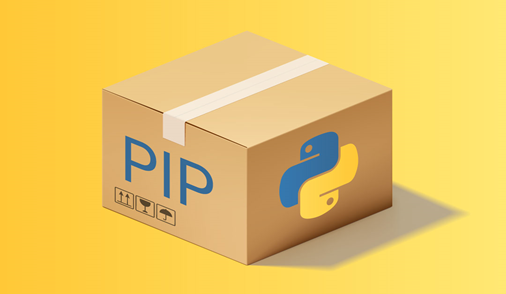

----
Imagen: https://towardsdatascience.com/make-your-own-python-package-6d08a400fc2d

## Packaging

El empaquetado y posterior distribucion (via PyPI) requiere que nuestro proyecto este **estructurado y configurado** de una forma específica.

Veamos:
 - Estructura
 - Configuración
 - Empaquetado y distribución

## Parte I: Estructura del Proyecto

Dependiendo de la longitud del proyecto, podemos tener dos estructuras diferentes: **Módulo** o **Paquete**.

### Estructura de Módulo:

Directorio raíz con todos los archivos fuentes.

+ **ProyectoX/**
    - proyectox.py
    - test_proyectox.py
    - pyproject.toml
    - README.md
    - LICENSE
    - MANIFEST.in
    - tox.ini

### Estructura de Paquete:
+ **ProyectoX/**
    + **proyectox/**
        - \_\_init\_\_.py
        - core.py
        - utilities.py
        + **dataset/**
            - \_\_init\_\_.py
            - data.csv
    + **tests/**
        - test_core.py
        - test_utilities.py
    - pyproject.toml
    - README.md
    - LICENSE
    - MANIFEST.in
    - tox.ini

## Parte II: Configuración del Proyecto

La configuración consiste en incluir la información y archivos necesarios para el empaquetado y distribución.

### Contenido de MANIFEST.in
Sirve para declarar el contenido del **Source Distribution (sdist)**, es decir, los archivos fuentes **necesarios**.

Contenido de ejemplo:

```
include LICENSE
include README.md
include pyproject.toml
recursive-include proyectox *.csv

exclude tox.ini
recursive-exclude tests *
```
Leer la documentación: https://packaging.python.org/guides/using-manifest-in/

La herramienta `check-manifest` nos permite verificar que estamos versionando los archivos especificados en `MANIFEST.in`

In [ ]:
!pip install check-manifest

### Contenido de pyproject.toml: Ejemplo con Pyedra

```toml
# probablemente mas cosas de black y pytest aca arriba

[build-system]
requires = ["setuptools"]
build-backend = "setuptools.build_meta"

[project]
name = "Pyedra"
version = "0.3.1"
authors = [{name = "Milagros Colazo", email = "milirita.colazovinovo@gmail.com"}]
license = {text = "The MIT License"}
readme = "README.md"
description = "Implementation of phase function for asteroids in Python"
keywords = ["pyedra", "asteroid", "phase function"]
classifiers = [
    "Development Status :: 4 - Beta",
    "Intended Audience :: Education",
    "Intended Audience :: Science/Research",
    "License :: OSI Approved :: MIT License",
    "Operating System :: OS Independent",
    "Programming Language :: Python",
    "Programming Language :: Python :: 3.8",
    "Programming Language :: Python :: Implementation :: CPython",
    "Topic :: Scientific/Engineering",
]
urls = {Homepage = "https://github.com/milicolazo/Pyedra"}
dependencies = ["numpy", "pandas", "scipy", "attrs", "matplotlib"]

[tool.setuptools]
packages = ["pyedra", "pyedra.*"]
include-package-data = true
```

## Parte III: Empaquetado y distribución

### Instalación local con pip
----
Si el archivo **setup.py** está bien configurado, el siguiente comando instala el paquete/módulo en su entorno virtual (porque siempre hay que usar entornos):
```bash
$ pip install .
$ pip install -e .  
```
El flag -e siginifica "editable" y los cambios en el código fuente siempre se reflejan en la instalación, es decir, no hay que volver a instalarlo.

### Empaquetado y distribución con PyPI

Esto permite que la librería sea accsesible a cualquiera con: `pip install proyectox`

1. Preparamos el build: `$ pip install -q build`
2. Creamos el build: `$ python -m build`
3. Subimos el paquete a test-pypi y vemos que todo este bien: 
   
   `$ twine upload -r testpypi dist/proyectox-0.1.0.tar.gz`
4. Subimos a pypi: `$ twine upload dist/proyectox-0.1.0.tar.gz`  

Notas: 
- hay que instalar twine
- **Ojo con el `*` si hay mas cosas de las que se quieren subir.**
- Hay que crear una cuenta: https://pypi.org/ y en https://test.pypi.org/